In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=97824ff516658256d2b4f5c605b47aa0


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [5]:
cities

['kapaa',
 'kalmunai',
 'wucheng',
 'baoding',
 'aklavik',
 'tuy hoa',
 'hammerfest',
 'longyearbyen',
 'kaitangata',
 'ushuaia',
 'yellowknife',
 'busselton',
 'norman wells',
 'natal',
 'albany',
 'qingdao',
 'tuktoyaktuk',
 'nizhneyansk',
 'rehoboth',
 'namatanai',
 'puerto ayora',
 'nuevo laredo',
 'petawawa',
 'hobart',
 'attawapiskat',
 'carnarvon',
 'victoria',
 'punta arenas',
 'talnakh',
 'bazarnyye mataki',
 'arraial do cabo',
 'sorland',
 'san patricio',
 'rikitea',
 'atuona',
 'hirara',
 'vaini',
 'cidreira',
 'saint-pierre',
 'illoqqortoormiut',
 'grimari',
 'porto walter',
 'aflu',
 'torbay',
 'sao felix do xingu',
 'belushya guba',
 'airai',
 'khatanga',
 'richards bay',
 'barcelos',
 'dikson',
 'faya',
 'opuwo',
 'bluff',
 'mataura',
 'walvis bay',
 'saint-philippe',
 'athens',
 'severobaykalsk',
 'burnie',
 'bambous virieux',
 'the valley',
 'meulaboh',
 'corinto',
 'phan rang',
 'virginia beach',
 'qaanaaq',
 'new norfolk',
 'hermanus',
 'pangody',
 'rapina',
 'saldan

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | kalmunai
Processing Record 3 of Set 1 | wucheng
Processing Record 4 of Set 1 | baoding
Processing Record 5 of Set 1 | aklavik
Processing Record 6 of Set 1 | tuy hoa
Processing Record 7 of Set 1 | hammerfest
Processing Record 8 of Set 1 | longyearbyen
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | natal
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | qingdao
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 19 of Set 1 | rehoboth
Processing Record 20 of Set 1 | namatanai
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | nuevo laredo
Pr

Processing Record 39 of Set 4 | solnechnyy
Processing Record 40 of Set 4 | port lincoln
Processing Record 41 of Set 4 | dolbeau
City not found. Skipping...
Processing Record 42 of Set 4 | alvdal
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | lanigan
Processing Record 45 of Set 4 | nhulunbuy
Processing Record 46 of Set 4 | ostrovskoye
Processing Record 47 of Set 4 | abu samrah
Processing Record 48 of Set 4 | gornozavodsk
Processing Record 49 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 50 of Set 4 | ankpa
Processing Record 1 of Set 5 | kautokeino
Processing Record 2 of Set 5 | mandalgovi
Processing Record 3 of Set 5 | laiyang
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | pochutla
Processing Record 6 of Set 5 | goma
Processing Record 7 of Set 5 | roald
Processing Record 8 of Set 5 | rio grande
Processing Record 9 of Set 5 | tyrma
Processing Record 10 of Set 5 | georgetown
Processing Record 11 of Set 5 | mogadishu
Pro

Processing Record 28 of Set 8 | college
Processing Record 29 of Set 8 | camacha
Processing Record 30 of Set 8 | sakakah
Processing Record 31 of Set 8 | saint-augustin
Processing Record 32 of Set 8 | itarema
Processing Record 33 of Set 8 | horsham
Processing Record 34 of Set 8 | sharjah
Processing Record 35 of Set 8 | afanasyevo
City not found. Skipping...
Processing Record 36 of Set 8 | lata
Processing Record 37 of Set 8 | nirgua
Processing Record 38 of Set 8 | chagoda
Processing Record 39 of Set 8 | boa vista
Processing Record 40 of Set 8 | nelson bay
Processing Record 41 of Set 8 | bom sucesso
Processing Record 42 of Set 8 | cap malheureux
Processing Record 43 of Set 8 | bar harbor
Processing Record 44 of Set 8 | san bartolome de tirajana
Processing Record 45 of Set 8 | sambava
Processing Record 46 of Set 8 | ostrovnoy
Processing Record 47 of Set 8 | miri
Processing Record 48 of Set 8 | samarai
Processing Record 49 of Set 8 | itaituba
Processing Record 50 of Set 8 | fairbanks
Process

Processing Record 18 of Set 12 | saint-georges
Processing Record 19 of Set 12 | touros
Processing Record 20 of Set 12 | seoul
Processing Record 21 of Set 12 | torrevieja
Processing Record 22 of Set 12 | ada
Processing Record 23 of Set 12 | geraldton
Processing Record 24 of Set 12 | puri
Processing Record 25 of Set 12 | bemidji
Processing Record 26 of Set 12 | soto la marina
Processing Record 27 of Set 12 | tual
Processing Record 28 of Set 12 | te anau
Processing Record 29 of Set 12 | tessalit
Processing Record 30 of Set 12 | grand river south east
City not found. Skipping...
Processing Record 31 of Set 12 | alcacer do sal
Processing Record 32 of Set 12 | nishihara
Processing Record 33 of Set 12 | dori
Processing Record 34 of Set 12 | praia
Processing Record 35 of Set 12 | manacapuru
Processing Record 36 of Set 12 | port-gentil
Processing Record 37 of Set 12 | urdzhar
City not found. Skipping...
Processing Record 38 of Set 12 | milkovo
Processing Record 39 of Set 12 | ambilobe
Processin

In [7]:
len(city_data)

576

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,84.18,68,90,5.01,US,2021-10-02 22:30:26
1,Kalmunai,7.4167,81.8167,78.15,83,68,5.35,LK,2021-10-02 22:38:20
2,Wucheng,29.6008,118.1750,73.94,85,0,3.11,CN,2021-10-02 22:38:20
3,Baoding,38.8511,115.4903,66.52,93,100,6.85,CN,2021-10-02 22:38:21
4,Aklavik,68.2191,-135.0107,36.43,93,90,13.80,CA,2021-10-02 22:38:21
5,Tuy Hoa,13.0833,109.3000,76.78,92,100,3.83,VN,2021-10-02 22:36:54
6,Hammerfest,70.6634,23.6821,54.05,71,20,11.50,NO,2021-10-02 22:38:22
7,Longyearbyen,78.2186,15.6401,37.24,87,75,0.00,SJ,2021-10-02 22:38:22
8,Kaitangata,-46.2817,169.8464,49.62,83,100,4.85,NZ,2021-10-02 22:38:22
9,Ushuaia,-54.8000,-68.3000,42.46,75,75,19.57,AR,2021-10-02 22:38:23


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df [new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-10-02 22:30:26,22.0752,-159.3190,84.18,68,90,5.01
1,Kalmunai,LK,2021-10-02 22:38:20,7.4167,81.8167,78.15,83,68,5.35
2,Wucheng,CN,2021-10-02 22:38:20,29.6008,118.1750,73.94,85,0,3.11
3,Baoding,CN,2021-10-02 22:38:21,38.8511,115.4903,66.52,93,100,6.85
4,Aklavik,CA,2021-10-02 22:38:21,68.2191,-135.0107,36.43,93,90,13.80
5,Tuy Hoa,VN,2021-10-02 22:36:54,13.0833,109.3000,76.78,92,100,3.83
6,Hammerfest,NO,2021-10-02 22:38:22,70.6634,23.6821,54.05,71,20,11.50
7,Longyearbyen,SJ,2021-10-02 22:38:22,78.2186,15.6401,37.24,87,75,0.00
8,Kaitangata,NZ,2021-10-02 22:38:22,-46.2817,169.8464,49.62,83,100,4.85
9,Ushuaia,AR,2021-10-02 22:38:23,-54.8000,-68.3000,42.46,75,75,19.57


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

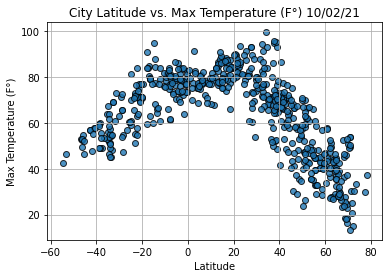

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature (F\N{DEGREE SIGN}) "+ time.strftime("%x"))
plt.ylabel(f"Max Temperature (F\N{DEGREE SIGN})")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

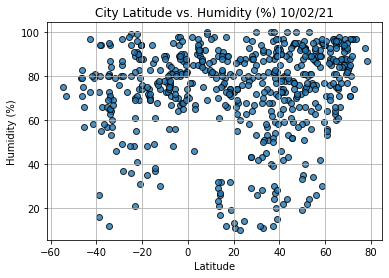

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

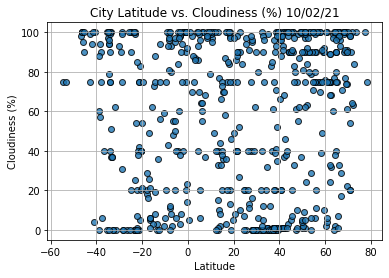

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

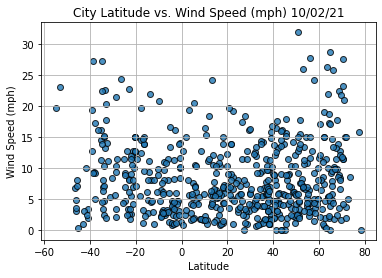

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (mph) "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print (r_value)

In [17]:
index13 = city_data_df.loc[13]
index13

City                        Natal
Country                        BR
Date          2021-10-02 22:34:45
Lat                        -5.795
Lng                      -35.2094
Max Temp                    79.45
Humidity                       83
Cloudiness                     20
Wind Speed                   8.05
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
571     True
572     True
573     True
574    False
575     True
Name: Lat, Length: 576, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-10-02 22:30:26,22.0752,-159.3190,84.18,68,90,5.01
1,Kalmunai,LK,2021-10-02 22:38:20,7.4167,81.8167,78.15,83,68,5.35
2,Wucheng,CN,2021-10-02 22:38:20,29.6008,118.1750,73.94,85,0,3.11
3,Baoding,CN,2021-10-02 22:38:21,38.8511,115.4903,66.52,93,100,6.85
4,Aklavik,CA,2021-10-02 22:38:21,68.2191,-135.0107,36.43,93,90,13.80


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

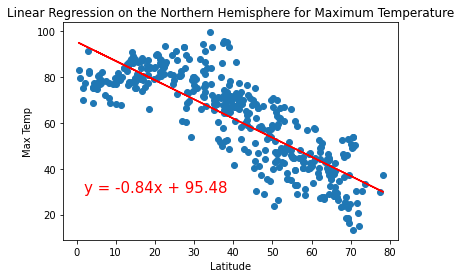

-0.8234012523420039


In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(2,30))

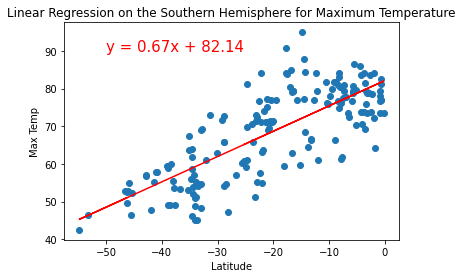

0.775074108264353


In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

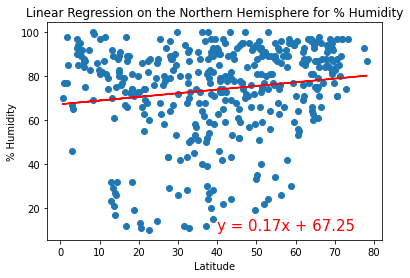

0.15398001371028877


In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40,10))

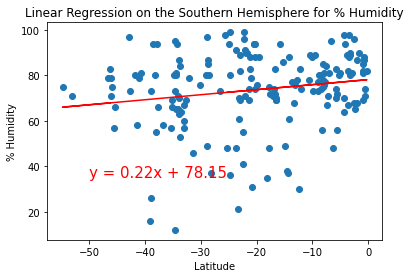

0.17788262563523588


In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity', (-50,35))

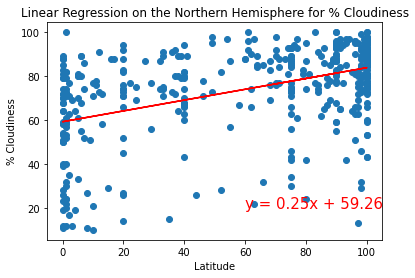

0.4445290283528119


In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness', (60,20))

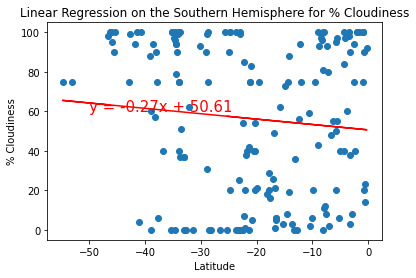

-0.096847115479397


In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

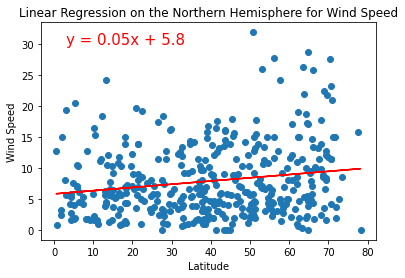

0.1769469956454397


In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(3,30))

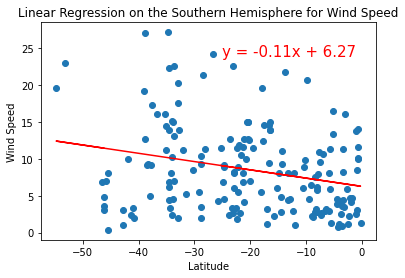

-0.2577404503034404


In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-25,24))